# Exercícios 1 e 3 (tarefa para retorno 1)

### Ex. 1: Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.


**Explicação:** aqui iremos verificar se a sobrevivência tem relação direta com o sexo do passageiro, ou seja, a taxa de mulheres sobreviventes foi maior do que a de homens? 

É importante ter sempre em mente a hipótese que queremos testar, nesse caso pode ser por exemplo: 

    - h0 = a taxa de sobrevivência tem relação direta com o sexo do passageiro. (Hipótese nula)
    - h1 = a taxa de sobrevivência não tem relação direta com o sexo do passageiro. (Hipótese alternativa)

Aqui estamos estudando duas variáveis categóricas: survived = 0 ou 1 e sex = male ou female, por isso podemos usar o chi-quadrado.

O chi-quadrado tem como princípio básico comparar proporções, ou seja, possíveis divergências entre as frequências observadas e esperadas para um certo evento.


**Etapas básicas:**

- Carregar os dados titanic.csv;
- Analisar a tabela;
- Estudar a relação entre as variáveis survived e sex;
    - Criar diferentes gráficos
    - Calcular chi-quadrado
    

Obs.: Todos os códigos são correspondentes aos códigos vistos em aula!

#### a) Carregar bibliotecas e os dados

In [1]:
# Bibliotecas essenciais

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")

print(df.shape)

df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


No conjunto de dados titanic temos 891 linhas (observações) e 12 colunas (características)

#### b) Calcular a probabilidade de sobreviver sendo homem e sendo mulher

In [3]:
prob_homem = df[(df.Survived==1) & ( df.Sex=='male')].shape[0] / df[df.Sex=='male'].shape[0]
prob_mulher = df[(df.Survived==1) & ( df.Sex=='female')].shape[0] / df[df.Sex=='female'].shape[0]

print("Probabilidade de sobreviver sendo homem:", (round(prob_homem,2)*100)) 
print("Probabilidade de sobreviver sendo mulher:", (round(prob_mulher,2)*100))

Probabilidade de sobreviver sendo homem: 19.0
Probabilidade de sobreviver sendo mulher: 74.0


In [4]:
#Fazendo uma análise similar a anterior usando Group By
#0- Morreram 
#1- Sobreviveram

df_survived_by_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()
df_survived_by_sex_pct = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()
print(round(df_survived_by_sex_pct*100))
print('*******************')
print(df_survived_by_sex)

           0     1
Sex               
female  26.0  74.0
male    81.0  19.0
*******************
          0    1
Sex             
female   81  233
male    468  109


**Qual sua conclusão a partir dos dados acima?**


**Você vê algum indicativo de relação entre ter sobrevivido e o sexo?**

### <font color='red'>A partir dos dados acima, é possível ver que o percentual de sobreviventes entre as mulheres foi amplamente maior com 74% contra 19% dos homens. Mesmo os homens estando em maior número, houveram 468 mortes entre eles e 81 mortes entre mulheres.</font>

#### c) Construção de gráfico

Estude o código abaixo!

Todo o código foi demonstrado durante a aula!

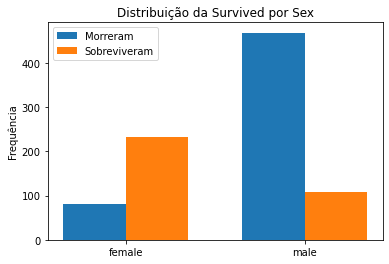

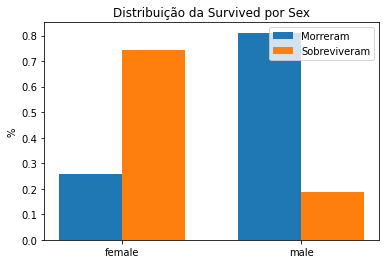

In [5]:
df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()

df_sex_prob = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

labels = list(df_sex.index) #labels do gráfico de barras

morreram = df_sex[0].values #valores para construção do grafico de barras
sobreviveram = df_sex[1].values #valores para construção do grafico de barras

morreram_prob = df_sex_prob[0].values #valores para construção do grafico de barras
sobreviveram_prob= df_sex_prob[1].values #valores para construção do grafico de barras


x = np.arange(len(labels))  #localização dos labels
width = 0.35  # largura das barras

fig, ax = plt.subplots() #construção do frame, criando figura e eixos

rects1 = ax.bar(x - width/2, morreram, width, label='Morreram') #valores para construção do gráfico de barras
rects2 = ax.bar(x + width/2, sobreviveram, width, label='Sobreviveram')

# Adicona título no gráfico, legenda nos eixos e no gráfico legenda
ax.set_ylabel('Frequência') #legenda eixo y
ax.set_title('Distribuição da Survived por Sex') #titulo
ax.set_xticks(x) #seta a posição dos labels
ax.set_xticklabels(labels) # legenda dos labels do eixo x
ax.legend() #legenda do gráfico
plt.show()

fig, ax1 = plt.subplots()
rects3 = ax1.bar(x - width/2, morreram_prob, width, label='Morreram')
rects4 = ax1.bar(x + width/2, sobreviveram_prob, width, label='Sobreviveram')

ax1.set_ylabel('%')
ax1.set_title('Distribuição da Survived por Sex')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Probability'>

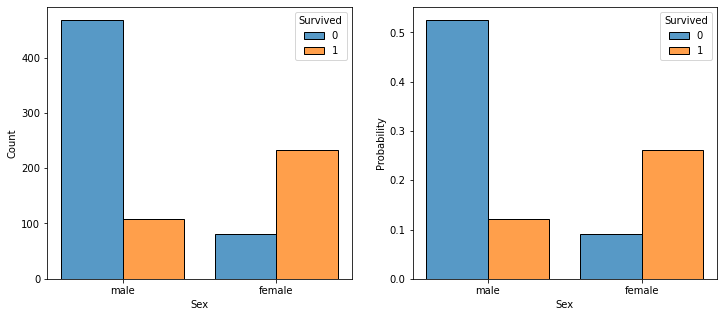

In [6]:
# Maneira alternativa usando a biblioteca Seaborn - NOVO!

import seaborn as sns

#seaborn é uma biblioteca muito útil para o dia a dia do cientista de dados.
# ele possui diferentes tipos de gráficos para visualização estatística.

# ref.: https://seaborn.pydata.org/

fig, axs = plt.subplots(1,2, figsize=[12,5])

sns.histplot(df, x='Sex', hue='Survived', stat='count', multiple='dodge', shrink=0.8, ax=axs[0])

#stat='count' : conta a quantidade de cada sexo de acordo com a sobrevivencia

sns.histplot(df, x='Sex', hue='Survived', stat='probability', multiple='dodge', shrink=0.8, ax=axs[1])

#stat='probability' : calcula a probabilidade de cada sexo de acordo com a sobrevivencia

**Qual conclusão você reforça com esses gráficos?**

### <font color='red'>Os gráficos reforçaram a interpretação dos cálculos feitos nos primeiros exercícios, onde é observada a ampla maioria de sobrevivência feminina entre os tripulantes do Titanic, tanto em percentual como em quantidade.</font>

#### d) Calcular o chi-quadrado

1) obter a distribuicao geral da variavel Survived;

2) obter a tabela de frequencia para os dados observados:

    - tabela de frequencia absoluta;
    - tabela de frequencia relativa.

3) adicionar o total na tabela de frequencia absoluta;

4) obter a tabela de frequência esperada:

    - caso as duas variáveis não tivesse relação.
    
5) cálculo do chi-quadrado:

Observado menos o esperado - desvio: $o_i - e_i$
    
Desvio ao quadrado: $\sigma^2 = (o_i - e_i)^2$

Chi-quadrado: $X^2 = (o_i - e_i)^2 / e_i$
   

In [7]:
# 1) Distribuição geral da variável survived como já observado antes:

dist_geral = pd.DataFrame(round(df.Survived.value_counts()/df.shape[0],2))

dist_geral

,Survived
0,0.62
1,0.38


In [8]:
# 2) Tabelas de frequencia absoluta e relativa:

df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()

df_sex_prob = round(df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.Survived.shape[0]).unstack(),2)

df_sex_prob

,0,1
Sex,,
female,0.26,0.74
male,0.81,0.19


In [9]:
# 3) Adicionar o total para cada sexo na tabela de frequência absoluta:

df_sex['total'] = df_sex[[0]].values + df_sex[[1]].values 

df_sex

,0,1,total
Sex,,,
female,81,233,314
male,468,109,577


In [10]:
# 4) Tabela de frequência esperada:

esp_0 = df_sex.total.values * dist_geral.iloc[0].values
esp_1 = df_sex.total.values * dist_geral.iloc[1].values

df_esp = pd.DataFrame(np.c_[esp_0,esp_1])

df_esp.rename(columns = {0:"Esperado para mortes", 1:"Esperado para sobreviventes"}, inplace= True)
df_esp.rename(index = {0:"female", 1:"male"}, inplace= True)

df_esp

,Esperado para mortes,Esperado para sobreviventes
female,194.68,119.32
male,357.74,219.26


In [11]:
# 5) Cálculo do chi-quadrado

# calculo dos desvios:

desvios = (df_sex.iloc[:,:2].values - df_esp.values)

print(desvios)

# calculo dos desvios ao quadrado:

desvios_ao_quadrado = desvios**2

# calculo do chi-quadrado:

chi_quad = sum(sum(desvios_ao_quadrado/df_esp.values)) 

print("\nO chi-quadrado de Pearson é de:", chi_quad)

[[-113.68  113.68]
 [ 110.26 -110.26]]

O chi-quadrado de Pearson é de: 264.11838848422303


**O que significa o valor do chi-quadrado de Pearson?**

**Quais foram as suas conclusões?**

### <font color='red'>O Qui Quadrado de Pearson quantifica a associação entre duas variáveis e o valor obtido demonstra o quão associadas elas estão. No caso acima, o valor de 264 demonstra que há uma associação considerável na taxa de sobrevivência quando comparamos ao sexo da pessoa</font>

### Ex3: Use o dataframe df, carregado abaixo, onde cada observação corresponde a uma reclamação feita pelo consumidor, para responder as perguntas abaixo:


1 - Qual o número de reclamações por Estado?

    - Calcular a quantidade de reclamações de acordo com os estados.

2 - Qual a quantidade de reclamações por sexo?

    - Calcular a quantidade de reclamações de acordo com o sexo do consumidor.

3 - O tempo de resposta tem alguma correlação com a nota do consumidor?

    - Verificar a correlação entre o tempo de resposta e a nota atribuída pelo consumidor.
    - Importante verificar qual o tipo das duas variáveis para determinar o método estatístico.
    - Lembre-se que aqui você estará testando a seguinte hipótese: 
    
        - h0 = o tempo de resposta tem relação direta com a nota do consumidor. (Hipótese nula)
        - h1 = o tempo de resposta não tem relação direta com a nota do consumidor. (Hipótese alternativa)

4 - Proporção de reclamações registradas e não respondidas.

    - Calcular a proporção (porcentagem) do total de reclamações registradas que não foram respondidas.

5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. 

    - Proponha outras hipóteses e verifique-as (no mínimo duas).


**Importante**: É interessante que as análises contenham gráficos! No dia-a-dia de um cientista, grande parte do  trabalho é analisar dados e gerar visualizações para apresentá-las.


_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).

In [12]:
import pandas as pd

df = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

print(df.shape)
df.head(5)

(43987, 38)


,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


In [13]:
df.describe() #Tentando localizar algum outlier

,Ano Abertura,Mês Abertura,Prazo Analise Gestor,Tempo Resposta,Nota do Consumidor,Total
count,43987.0,43987.000000,1953.000000,41961.000000,28627.000000,43987.0
mean,2014.0,9.550435,4.768049,6.667572,3.007021,1.0
std,0.0,1.898572,4.395177,3.066805,1.681700,0.0
min,2014.0,5.000000,0.000000,0.000000,1.000000,1.0
25%,2014.0,8.000000,1.000000,4.000000,1.000000,1.0
50%,2014.0,10.000000,4.000000,8.000000,3.000000,1.0
75%,2014.0,11.000000,8.000000,9.000000,5.000000,1.0
max,2014.0,12.000000,15.000000,13.000000,5.000000,1.0


In [13]:
#1- Número de reclamações por estado

#reclamacoes_estado = df.groupby('UF').apply(lambda x: x.UF.value_counts())

reclamacoes_estado =df['UF'].value_counts()
reclamacoes_estado

SP    11882
PR     6140
RJ     4907
MG     4186
BA     2443
RS     1941
DF     1805
PE     1626
SC     1458
MA     1082
ES     1081
CE     1068
MT     1012
GO      886
MS      531
AC      449
PB      343
AM      291
PA      211
RN      160
RO      119
AL      104
SE       97
PI       77
TO       46
RR       24
AP       18
Name: UF, dtype: int64

Text(0, 0.5, 'Reclamações')

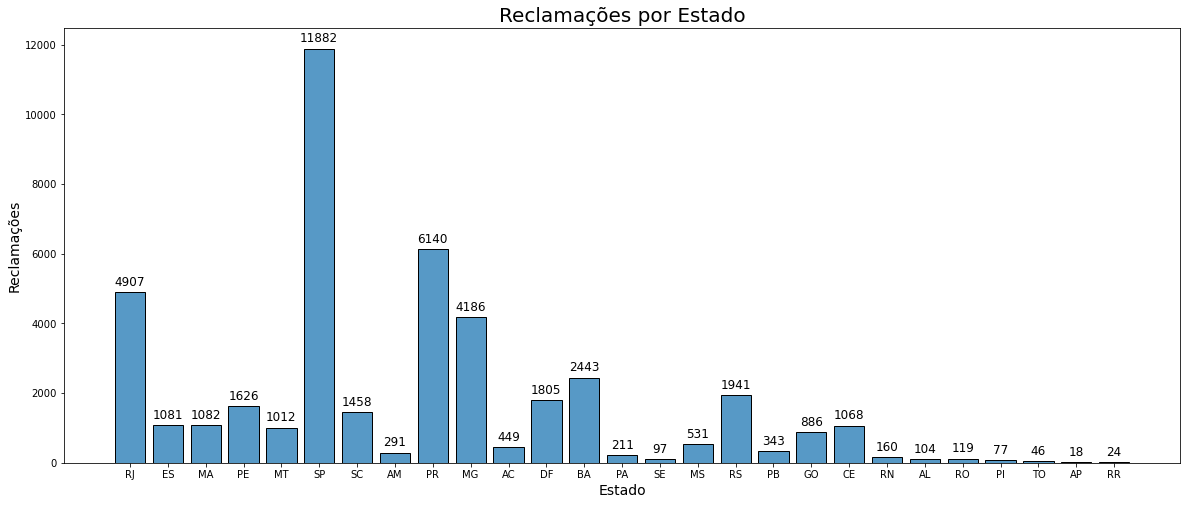

In [14]:
#Comprovação gráfica dos resultados

fig, axs = plt.subplots(1, figsize=[20,8])

chart_estado = sns.histplot(df, x='UF', stat='count', multiple='dodge', shrink=0.8)
chart_estado.set_title('Reclamações por Estado',size=20)

for p in chart_estado.patches:
    chart_estado.annotate((p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 10), 
                   textcoords = 'offset points',
                  )
    
plt.xlabel("Estado", size=14)
plt.ylabel("Reclamações", size=14)

In [15]:
#2 - Qual a quantidade de reclamações por sexo?
reclamacoes_por_Sexo =df['Sexo'].value_counts()
reclamacoes_por_Sexo

M    27895
F    16092
Name: Sexo, dtype: int64

Text(0, 0.5, 'Reclamações')

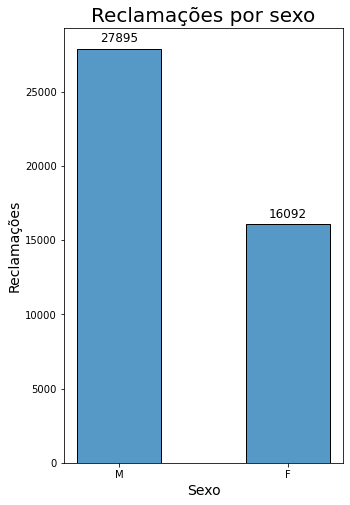

In [16]:
fig, axs = plt.subplots(1, figsize=[5,8])

chart_sexo = sns.histplot(df, x='Sexo', stat='count', multiple='dodge', shrink=0.5)
chart_sexo.set_title('Reclamações por sexo',size=20)

for p in chart_sexo.patches:
    chart_sexo.annotate((p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 10), 
                   textcoords = 'offset points',
                  )
    
plt.xlabel("Sexo", size=14)
plt.ylabel("Reclamações", size=14)

In [17]:
#3- O tempo de resposta tem alguma correlação com a nota do consumidor?

pd.set_option('max_columns', None)

df.head(2)

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,Hora Abertura,Data Resposta,Hora Resposta,Data Análise,Hora Análise,Data Recusa,Hora Recusa,Data Finalização,Hora Finalização,Prazo Resposta,Prazo Analise Gestor,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,19:05:11,02/07/2014,19:30:10,NaN,NaN,NaN,NaN,22/07/2014,23:48:04,07/07/2014,NaN,5.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,Cobrança de compra/saque não reconhecido,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,13:35:22,17/06/2014,08:44:35,NaN,NaN,NaN,NaN,17/06/2014,09:24:10,21/06/2014,NaN,6.0,Magazineluiza.com,Comércio Eletrônico,Produtos de Telefonia e Informática,Aparelho celular,Entrega do Produto,Não entrega / demora na entrega do produto,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1


In [18]:
# As varáveis Tempo de resposta e Nota do Consumidor são ambas quantitativas. Adotaremos a análise de correlação linear
df[['Tempo Resposta','Nota do Consumidor']].head(5)

,Tempo Resposta,Nota do Consumidor
0,5.0,NaN
1,6.0,1.0
2,5.0,5.0
3,0.0,5.0
4,1.0,NaN


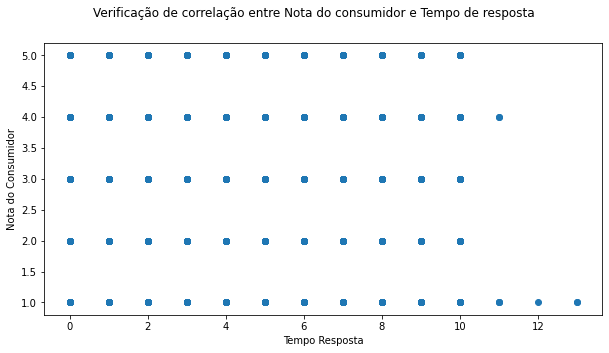

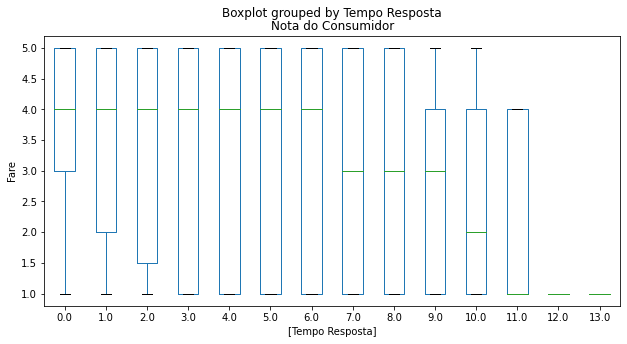

In [19]:
plt.figure(figsize=[10,5])
plt.subplots_adjust(wspace= 0.1)
plt.suptitle('Verificação de correlação entre Nota do consumidor e Tempo de resposta')


plt.scatter(df['Tempo Resposta'],df['Nota do Consumidor'])
plt.xlabel('Tempo Resposta')
plt.ylabel('Nota do Consumidor')

df.boxplot('Nota do Consumidor', by = ['Tempo Resposta'], figsize= [10,5])
plt.ylabel('Fare')
plt.grid(False)

### <font color='red'>Olhando graficamente, não há de forma clara uma correlação entre a nota e o tempo de resposta. Houveram notas altas para tempos mais longos e notas baixas para tempos menores. Vamos seguir com a análise:</font>

In [20]:
# A seguir, vamos calcular a possibilidade de se obter uma nota alta de acordo com o tempo médio de resposta

dist_geral_notas = pd.DataFrame(round(df.groupby('Nota do Consumidor').apply(lambda x: x['Tempo Resposta'].mean())))

dist_geral_notas.rename(columns = {0:"Tempo médio de resposta (Dias)"}, inplace= True)
dist_geral_notas

,Tempo médio de resposta (Dias)
Nota do Consumidor,
1.0,7.0
2.0,7.0
3.0,7.0
4.0,6.0
5.0,6.0


In [21]:
df_notas = df.groupby('Nota do Consumidor').apply(lambda x: x['Tempo Resposta'].value_counts()).unstack()

df_notas

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Nota do Consumidor,,,,,,,,,,,,,,
1.0,150.0,461.0,467.0,487.0,495.0,548.0,575.0,819.0,1298.0,1469.0,3050.0,3.0,1.0,2.0
2.0,27.0,87.0,113.0,96.0,92.0,125.0,119.0,166.0,256.0,244.0,549.0,NaN,NaN,NaN
3.0,131.0,241.0,249.0,218.0,236.0,226.0,250.0,346.0,464.0,527.0,850.0,NaN,NaN,NaN
4.0,106.0,352.0,311.0,301.0,323.0,328.0,336.0,430.0,487.0,490.0,837.0,2.0,NaN,NaN
5.0,351.0,773.0,727.0,667.0,651.0,654.0,720.0,858.0,990.0,887.0,1494.0,NaN,NaN,NaN


#### <font color='red'>Nas tabelas acima, vemos que a média de tempo de espera foi muito próxima para todas as notas e que há uma grande quantidade de notas altas até 10 dias de espera e uma quantidade também alta de notas baixas com períodos de resposta bem curtos</font>

In [22]:
correlacao = df['Nota do Consumidor'].corr(df['Tempo Resposta'])
print('A correlacao linear entre a nota do consumidor e o tempo de resposta foi de',round(correlacao,2))

A correlacao linear entre a nota do consumidor e o tempo de resposta foi de -0.19


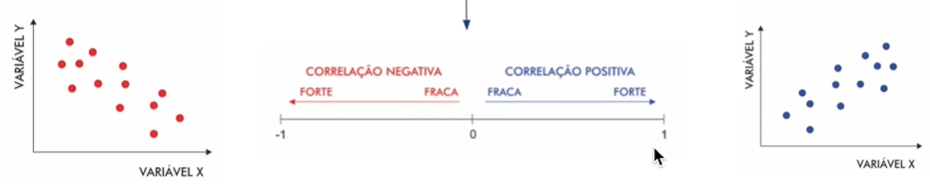

#### <font color='red'>Como pudemos ver no resultado acima, a correlação de -0,19 entre as variáveis Tempo de resposta e nota do consumidor indica uma correlação fraca por estar próxima de zero, encerrando assim nossa análise para este caso</font>

In [338]:
#4- Proporção de reclamações registradas e não respondidas.

In [339]:
df['Respondida'].unique()

array(['S', 'N'], dtype=object)

In [340]:
prob_homem  =round(df[(df['Respondida'])=='N'].shape[0] / df.shape[0]*100,2)
print('A probabilidade de uma reclamação ser aberta e não ser respondida é de',prob_homem,'%')

A probabilidade de uma reclamação ser aberta e não ser respondida é de 4.61 %


In [341]:
#5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las.

#- Proponha outras hipóteses e verifique-as (no mínimo duas).
#Importante: É interessante que as análises contenham gráficos! No dia-a-dia de um cientista, grande parte do trabalho é analisar dados e gerar visualizações para apresentá-las.

In [638]:
pd.set_option('max_columns', None)

df.head(3)

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,Hora Abertura,Data Resposta,Hora Resposta,Data Análise,Hora Análise,Data Recusa,Hora Recusa,Data Finalização,Hora Finalização,Prazo Resposta,Prazo Analise Gestor,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,19:05:11,02/07/2014,19:30:10,NaN,NaN,NaN,NaN,22/07/2014,23:48:04,07/07/2014,NaN,5.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,Cobrança de compra/saque não reconhecido,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,13:35:22,17/06/2014,08:44:35,NaN,NaN,NaN,NaN,17/06/2014,09:24:10,21/06/2014,NaN,6.0,Magazineluiza.com,Comércio Eletrônico,Produtos de Telefonia e Informática,Aparelho celular,Entrega do Produto,Não entrega / demora na entrega do produto,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,19:23:36,02/07/2014,19:46:56,NaN,NaN,NaN,NaN,03/07/2014,23:55:22,07/07/2014,NaN,5.0,Banco Santander Cartões,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1


#### <font color='red'>Para início da análise, comecei a investigar a faixa etária de quem faz as reclamações</font>

In [640]:
reclamacoes_faixa_etaria = df['Faixa Etária'].value_counts()
reclamacoes_faixa_etaria

entre 31 a 40 anos    16741
entre 21 a 30 anos     9154
entre 41 a 50 anos     8364
entre 51 a 60 anos     5542
entre 61 a 70 anos     2973
mais de 70 anos        1199
até 20 anos              14
Name: Faixa Etária, dtype: int64

#### <font color='red'>A primeira análise feita foi saber em qual faixa etária se concentra o maior número de reclamações</font>

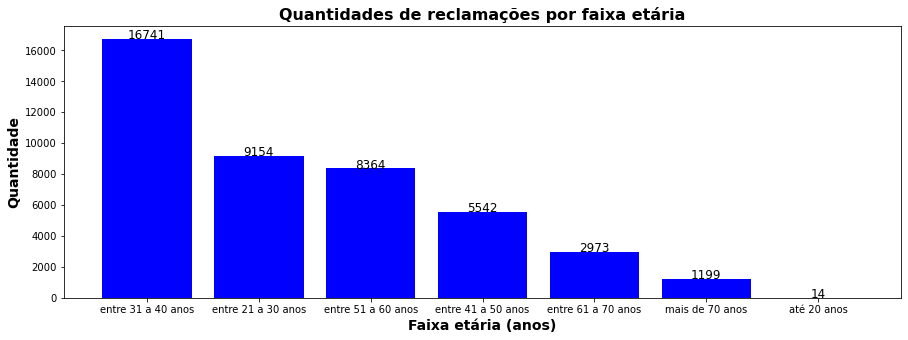

In [641]:
plt.figure(figsize=[15,5])
labels = list(df['Faixa Etária'].unique())
x_pos = np.arange(len(labels))
reclamacoes_faixa_etaria = df['Faixa Etária'].value_counts()
                

plt.bar(x_pos, reclamacoes_faixa_etaria, width=0.8, align='center', alpha=1, color='blue')
plt.xticks(x_pos, labels)
plt.ylabel('Quantidade',size=14,weight='bold')
plt.xlabel('Faixa etária (anos)',size=14,weight='bold')
plt.title('Quantidades de reclamações por faixa etária',size=16,weight='bold')

for i in range(len(x_pos)):
        plt.text(i, reclamacoes_faixa_etaria[i], reclamacoes_faixa_etaria[i], ha = 'center',size=12)
        
plt.show()


#### <font color='red'>Em seguida optei por construir um Dataframe listando as empresas com maior número de reclamações para verificar a eficácia delas em resolvê-las. O intuito dessa análise é proporcionar ao cliente um insigh importante antes de comprar algo da empresa, visto que se precisar de um atendimento pós-venda, pode se frustrar.</font>

In [427]:
top_reclamacoes = pd.DataFrame(df['Nome Fantasia'].value_counts())
top_reclamacoes['Respondidas'] = df[df.Respondida == 'S']['Nome Fantasia'].value_counts().astype("Int64")
top_reclamacoes['Não respondidas'] = top_reclamacoes['Nome Fantasia'] - top_reclamacoes['Respondidas']
top_reclamacoes['Resolvidas'] = df[(df['Avaliação Reclamação']) == 'Resolvida']['Nome Fantasia'].value_counts().astype("Int64")
top_reclamacoes['Percentual de solução (%)'] = round((top_reclamacoes['Resolvidas'] / top_reclamacoes['Nome Fantasia'])*100,2)
top_reclamacoes['Avaliação média do consumidor'] = round(df.groupby('Nome Fantasia').apply(lambda x: x['Nota do Consumidor'].mean()),2)

top_reclamacoes.rename(columns = {'Nome Fantasia':"Reclamações recebidas"}, inplace= True)
top_reclamacoes.head()

,Reclamações recebidas,Respondidas,Não respondidas,Resolvidas,Percentual de solução (%),Avaliação média do consumidor
Oi Fixo,5549,5495,54,1985,35.77,2.71
Vivo - Telefônica (GVT),5403,5341,62,2741,50.73,3.21
Tim,3883,3841,42,1491,38.4,2.82
Claro Celular,2493,2426,67,1346,53.99,3.80
SKY,2098,2081,17,974,46.43,2.92


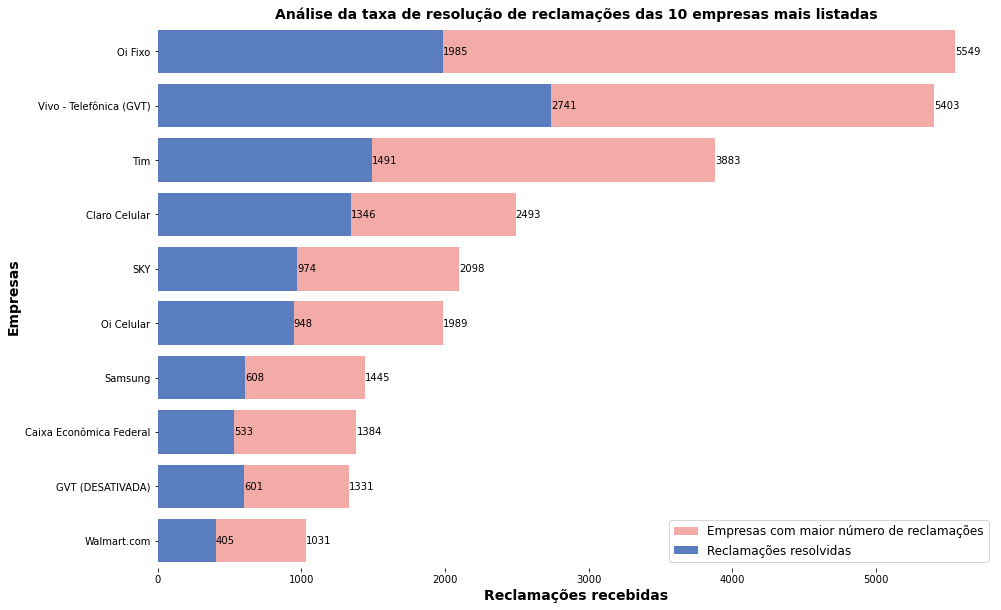

In [645]:
top_10 = top_reclamacoes.head(10)
empresas = list(top_10.index)

fig, ax = plt.subplots(figsize=[15,10])

# Plotando o total de reclamações
sns.set_color_codes("pastel")
chart = sns.barplot(y=empresas, x='Reclamações recebidas', data=top_10, label='Empresas com maior número de reclamações', color="r" )

# Plotando o total de reclamações resolvidas
sns.set_color_codes("muted")
chart = sns.barplot(y=empresas, x='Resolvidas', data=top_10, label="Reclamações resolvidas", color="b")

# Legenda
ax.legend(ncol=1, loc="lower right", frameon=True, fontsize=12)

plt.xlabel('Reclamações recebidas', size=14, weight='bold')
plt.ylabel('Empresas', size=14, weight='bold')
plt.title('Análise da taxa de resolução de reclamações das 10 empresas mais listadas',size=14, weight='bold')

for container in ax.containers:
    ax.bar_label(container)

sns.despine(left=True, bottom=True)

plt.show()